In [3]:
import warnings
import os
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
st = pd.HDFStore(os.path.expanduser("/Users/nipunbatra/wiki-all.h5"))

In [13]:
st['/54']['2014'].head().index

DatetimeIndex(['2014-01-16 00:00:00-06:00', '2014-01-16 01:00:00-06:00',
               '2014-01-16 02:00:00-06:00', '2014-01-16 03:00:00-06:00',
               '2014-01-16 04:00:00-06:00'],
              dtype='datetime64[ns, US/Central]', freq=None)

In [5]:
metadata_df = pd.read_csv("/Users/nipunbatra/w/dataport-metadata.csv",index_col=0)


In [6]:
sd_data = metadata_df[metadata_df['city'] == "San Diego"]


In [9]:
sd_homes = sd_data.index.values.astype('int')

In [4]:
out_df = {}
mat_appliance={}
for appliance_name, appliance_homes in all_homes.iteritems():
    print appliance_name
    #for appliance_name, appliance_homes in {"fridge":all_homes["fridge"]}.iteritems():
    out_df[appliance_name] = []
    for home in appliance_homes:
        df_st = st['%d' %home]['2014']
        cols = df_st.columns
        if appliance_name=="fridge":
            df = df_st['refrigerator1'].resample("15T").astype('float64').head(96*100)
        elif appliance_name=="hvac":
            df = df_st['air1']['2014-5-1':'2014-10-31'].resample("15T").astype('float64')
            if 'air2' in cols:
                df+= df_st['air2']['2014-5-1':'2014-10-31'].resample("15T").astype('float64')
        elif appliance_name=="wm":
            df = df_st['clotheswasher1'].resample("15T").astype('float64').head(96*100).astype('float64')
        elif appliance_name=="dw":
            df = df_st['dishwasher1'].resample("15T").astype('float64').head(96*100).astype('float64')
        elif appliance_name=="mw":
            df = df_st['microwave1'].resample("15T").astype('float64').head(96*100).astype('float64')
        elif appliance_name=="oven":
            df = df_st['oven1'].resample("15T").astype('float64').head(96*100).astype('float64')
       
        
        
        df = df.groupby(level=0).last()
        df = pd.DataFrame(df)
        df.columns=['power']
        df["day"] = df.index.dayofyear
        df["minute"] = df.index.hour*60 + df.index.minute
        df = df.pivot(index="day", values="power",columns="minute")
        out_df[appliance_name].append(df)
    mat_appliance[appliance_name] = pd.concat(out_df[appliance_name]).values

hvac
light
wm
fridge
dw
dr


Getting fridge data

In [4]:
from nilmtk import *
import nilmtk

In [5]:
out_df = []
for home in [370, 545]:
    df = st['%d' %home]['2013'][['refrigerator1']].resample("15T").head(96*28).astype('float64')
    df = df.groupby(level=0).last()
    df["day"] = df.index.dayofyear
    df["minute"] = df.index.hour*60 + df.index.minute
    df = df.pivot(index="day", values="refrigerator1",columns="minute")
    out_df.append(df)

In [6]:
pd.concat(out_df).head()

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:90: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:96: DeprecationWarning: DisplayFormatter._formatters_default is deprecated: use @default decorator instead.
  def _formatters_default(self):
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:675: DeprecationWarning: PlainTextFormatter._deferred_printers_default is deprecated: use @default decorator instead.
  def _deferred_printers_default(self):
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:667: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):
/Users/nipunbatra/anaconda/lib/python2.7/s

minute,0,15,30,45,60,75,90,105,120,135,...,1290,1305,1320,1335,1350,1365,1380,1395,1410,1425
day,,,,,,,,,,,,,,,,,,,,,
1,116.733330,3.066667,3.066667,48.666668,84.466667,33.000000,79.533333,109.000000,93.666664,84.466667,...,20.066668,119.133331,97.000000,66.199997,84.066666,21.600000,4.000000,4.000000,56.799999,176.199997
2,135.000000,18.266666,4.000000,44.333332,84.800003,44.200001,4.000000,59.200001,132.733337,132.266663,...,3.000000,3.000000,3.000000,60.733334,130.800003,140.199997,52.933334,3.000000,23.400000,85.400002
3,64.599998,3.000000,22.466667,115.466667,139.000000,82.199997,22.733334,3.000000,3.000000,29.799999,...,96.533333,123.400002,91.199997,71.599998,3.133333,3.200000,3.066667,57.533333,144.000000,142.399994
4,34.200001,3.133333,12.133333,85.933334,76.466667,3.066667,66.400002,110.599998,83.599998,83.199997,...,3.200000,87.666664,82.266670,41.333332,114.199997,62.733334,51.666668,84.400002,41.000000,3.000000
5,3.000000,26.799999,201.066666,150.866669,3.000000,3.000000,3.000000,71.333336,82.533333,18.133333,...,146.199997,10.733334,3.000000,21.200001,85.599998,66.866669,3.000000,89.000000,109.133331,97.133331


In [7]:
fridge_matrix = pd.concat(out_df).values

In [8]:
fridge_matrix.dtype

dtype('float64')

In [9]:
import scipy.io as sio

In [57]:
sio.savemat("/Users/nipunbatra/Desktop/appliances.mat",mat_appliance)

In [12]:
%%matlab
cd('/Users/nipunbatra/Google Drive/matlab-codes-for-generating-parameters-in-LBM/generatePopulationModels');
pwd;
demo_domainKnowledgeAppliance('/Users/nipunbatra/Desktop/fridge.mat')

MatlabInterperterError: Failed to parse and evaluate line u"cd('/Users/nipunbatra/Google Drive/matlab-codes-for-generating-parameters-in-LBM/generatePopulationModels');\npwd;\ndemo_domainKnowledgeAppliance('/Users/nipunbatra/Desktop/fridge.mat')".
 Matlab error message: u'Argument must contain a string.'

### TODO- Pass this data to Matlab now

In [4]:
from latent_Bayesian_melding import LatentBayesianMelding

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/hmmlearn/base.py:8: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from . import _hmmc


In [5]:
lbm = LatentBayesianMelding()

In [6]:
from os.path import join

In [7]:
meterlist = ['hvac','fridge','dw','dr','wm','light']

In [8]:
individual_model = lbm.import_model(meterlist,'/Users/nipunbatra/Desktop/lbn.json')
#individual_model = lbm.import_model(meterlist,'/Users/nipunbatra/git/monthly-disaggregation/code/appliance_model_induced_density.json')

The trained meter: hvac
The trained meter: fridge
The trained meter: dw
The trained meter: dr
The trained meter: wm
The trained meter: light


In [30]:
all_homes_all_appliance

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:90: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:96: DeprecationWarning: DisplayFormatter._formatters_default is deprecated: use @default decorator instead.
  def _formatters_default(self):
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:675: DeprecationWarning: PlainTextFormatter._deferred_printers_default is deprecated: use @default decorator instead.
  def _deferred_printers_default(self):
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:667: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):
/Users/nipunbatra/anaconda/lib/python2.7/s

array([   26.,    94.,   370.,   410.,   545.,   624.,  1283.,  1334.,
        1642.,  1953.,  2129.,  2156.,  2242.,  2470.,  2814.,  3367.,
        3456.,  3482.,  3723.,  3967.,  4732.,  4767.,  5357.,  5371.,
        5746.,  5785.,  5814.,  6072.,  6636.,  6836.,  6910.,  7016.,
        7731.,  7769.,  7866.,  8317.,  9052.,  9609.,  9654.,  9922.,
        9933.,  9934.,  9982.])

In [10]:
import numpy as np
all_homes_all_appliance = []
for appliance in ["fridge","hvac","dr","dw","wm","light"]:
    all_homes_all_appliance = np.union1d(all_homes_all_appliance, all_homes[appliance])

In [29]:
import time
def disaggregate_home(home):
    df = pd.read_csv("data/%d.csv" %home, index_col=0)
    df.index = pd.to_datetime(df.index)

    #df = st['/%d' %home]['2013'][['use']].resample("15T").astype('float64').dropna()
    df['day'] = df.index.dayofyear
    g = df.groupby("day")
    out = []
    for day in range(1, 10):
        print day, home
        try:
            mains = g.get_group(day)['use']
            result = lbm.disaggregate_chunk(mains)
            out.append(result['inferred appliance energy'])
        except:
            pass
    res_home = pd.concat(out)
    res_home.to_csv("%d.csv" %home)
    

In [20]:
!mkdir data

In [ ]:
for home in all_homes_all_appliance[:]:
    df = st['/%d' %home]['2013'][['use']].resample("15T").astype('float64').dropna()
    df.to_csv("data/%d.csv" %home)
    

In [26]:
start = time.time()
for home in all_homes_all_appliance[:2]:
    disaggregate_home(home)
end = time.time()
print end-start

1 26.0
2 26.0
3 26.0
4 26.0
1 94.0
2 94.0
3 94.0
4 94.0
47.9365930557


In [27]:
from pathos.multiprocessing import Pool
p = Pool(4)

In [28]:
start = time.time()
p.map(disaggregate_home, all_homes_all_appliance[:3])
end = time.time()
print end-start

46.0190169811
1 26.0
1 94.0
1 370.0
222 26.0
 94.0
 370.0
333 26.0
 94.0
 370.0
444 26.0
 94.0
 370.0


In [ ]:
store = pd.HDFStore("lbn_try1.h5")
from pathos.multiprocessing import Pool
p = Pool(4)
for home in all_homes_all_appliance[:4]:
    start = time.time()
    
    print "%"*20
    print home 
    
    store.put("%d" %home, res_home)
    end = time.time()
    print end-start
    print "*"*20
    
    
    

%%%%%%%%%%%%%%%%%%%%
26.0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
27

KeyboardInterrupt: 

51
52
53
54


KeyboardInterrupt: 

55
56

In [71]:
store['/26']

,hvac,fridge,dw,dr,wm,light,inferred mains,mains
localminute,,,,,,,,
2013-01-01 00:00:00-06:00,1649.097509,1.245894,0.019975,0.190484,0.012958,0.001770,1650.568590,1691.400024
2013-01-01 00:15:00-06:00,1649.208268,48.619677,0.073767,5.096865,0.033634,0.003055,1703.035265,1743.866699
2013-01-01 00:30:00-06:00,1649.354092,106.393162,0.077850,59.433428,0.040128,0.003206,1815.301866,1856.133301
2013-01-01 00:45:00-06:00,1649.460729,110.138409,0.077054,102.712629,0.043246,0.003223,1862.435289,1903.266724
2013-01-01 01:00:00-06:00,1649.597811,112.318692,0.080382,194.790033,0.045043,0.003230,1956.835192,1997.666626
2013-01-01 01:15:00-06:00,1649.951663,112.544235,0.093161,241.596917,0.045997,0.003243,2004.235216,2045.066650
2013-01-01 01:30:00-06:00,1648.756352,41.179429,0.063081,44.188837,0.044314,0.003203,1734.235216,1775.066650
2013-01-01 01:45:00-06:00,1649.351952,111.841595,0.096094,936.296325,0.045912,0.003242,2697.635118,2738.466553
2013-01-01 02:00:00-06:00,1648.493076,111.543182,0.070608,485.346914,0.044822,0.003216,2245.501818,2286.333252


In [39]:
%matplotlib inline

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was se

In [42]:
lbm.NosOfIters

3

In [44]:
pred = pd.concat(out)

In [63]:
prd_fridge= pred['dw']

In [62]:
gt = st['/%d' %home]['2013']['dishwasher1'].resample("15T")

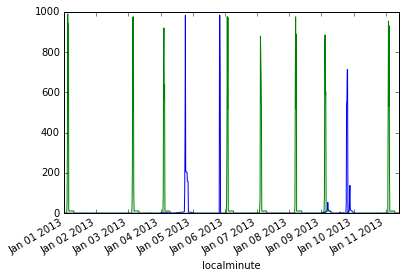

In [66]:
prd_fridge.head(1000).plot()
gt.head(1000).plot()

In [56]:
import numpy as np
100 - 100*np.abs(prd_fridge-gt)/gt

10.06959325862114

In [16]:
#appliance='hvac'
#variableOfNosOfCycles[appliance]
lbm.individual['hvac']['numberOfCyclesStats']['numberOfCycles']

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [16]:
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in xrange(0, len(seq), size))

In [17]:
import time
start = time.time()
r = lbm.disaggregate_chunk(mains)
end = time.time()
print end-start

/Users/nipunbatra/.local/lib/python2.7/site-packages/mosek/fusion/__init__.py:35823: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if   ((v == None) or (vals == None)):
/Users/nipunbatra/.local/lib/python2.7/site-packages/mosek/fusion/__init__.py:35931: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if   ((mx == None) or (v == None)):
/Users/nipunbatra/.local/lib/python2.7/site-packages/mosek/fusion/__init__.py:35953: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if   ((mx == None) or (v == None)):
/Users/nipunbatra/.local/lib/python2.7/site-packages/mosek/fusion/__init__.py:35320: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if   ((lhs == None) or (rhs == None)):
/Users/nipunbatra/.local/lib/python2.7/site-packages/mosek/fusion/__init__.py:26391: FutureWarning: compari

92.7791349888


In [69]:
proc = 4
size = len(mains)/proc
from pathos.multiprocessing import Pool
p = Pool(proc)

In [70]:
size

8758

In [ ]:
import time
start = time.time()
r1 = p.map(lbm.disaggregate_chunk, chunker(mains, size))
r2 = pd.concat([x['inferred appliance energy'] for x in r1])
end = time.time()
print end-start


In [45]:
len(mains)

2688

In [48]:
r2.index.is_monotonic

True

In [17]:
results = lbm.disaggregate_chunk(mains)

/Users/nipunbatra/.local/lib/python2.7/site-packages/mosek/fusion/__init__.py:35823: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if   ((v == None) or (vals == None)):
/Users/nipunbatra/.local/lib/python2.7/site-packages/mosek/fusion/__init__.py:35931: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if   ((mx == None) or (v == None)):
/Users/nipunbatra/.local/lib/python2.7/site-packages/mosek/fusion/__init__.py:35953: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if   ((mx == None) or (v == None)):
/Users/nipunbatra/.local/lib/python2.7/site-packages/mosek/fusion/__init__.py:35320: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if   ((lhs == None) or (rhs == None)):
/Users/nipunbatra/.local/lib/python2.7/site-packages/mosek/fusion/__init__.py:26391: FutureWarning: compari

----------------------------------------------------------------------------------------------------
*************Iteration: 1*****************
Employing the Mosek solver to solve the problem:

Declaring variables and constraints...


 Solving the problem ...

+++++++++++++++optimization status+++++++++++++++++++
Number of variables:20180
Number of constraints:13688
Primal solution status:SolutionStatus.Optimal
Primal value:48642216.2251
Dual solution status:SolutionStatus.Optimal
Dual value:48642216.2248
Accepted solution status:AccSolutionStatus.Anything
+++++++++++++++optimization status+++++++++++++++++++
Solving this problem took '3.41081905365' seconds

 log(datalikelihood*prior)=-28269.4411556

*************Iteration: 2*****************
Employing the Mosek solver to solve the problem:

Declaring variables and constraints...


 Solving the problem ...

+++++++++++++++optimization status+++++++++++++++++++
Number of variables:20180
Number of constraints:13688
Primal solution statu

In [19]:
%matplotlib inline

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was se

In [66]:
results

<module 'nilmtk.results' from '/Users/nipunbatra/git/nilmtk/nilmtk/results.pyc'>

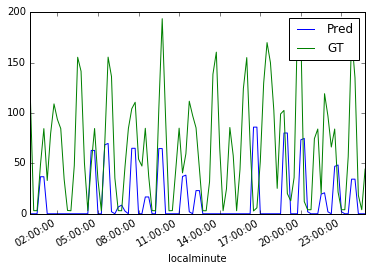

In [20]:
import matplotlib.pyplot as plt
results['inferred appliance energy']['fridge'].head(100).plot(label='Pred')
df['refrigerator1'].head(100).plot(label='GT')
plt.legend()
plt.savefig("/Users/nipunbatra/Desktop/lbn_fridge.png")

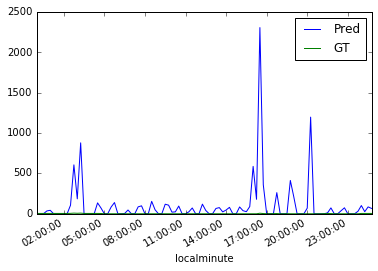

In [21]:
results['inferred appliance energy']['hvac'].head(100).plot(label='Pred')
df['air1'].head(100).plot(label='GT')
plt.legend()
plt.savefig("/Users/nipunbatra/Desktop/hvac.png")

In [39]:
results['inferred appliance energy'].head()

,hvac,fridge,inferred mains,mains
localminute,,,,
2013-01-01 00:00:00-06:00,0.000101,0.000054,0.000154,1119.599976
2013-01-01 00:15:00-06:00,0.000161,0.000126,0.000288,1143.933350
2013-01-01 00:30:00-06:00,0.000220,0.000206,0.000426,1284.733276
2013-01-01 00:45:00-06:00,35.879779,35.630906,71.510685,1440.400024
2013-01-01 01:00:00-06:00,44.013008,35.630972,79.643979,1448.533325


In [22]:
results['inferred appliance energy'].head()

,hvac,fridge,inferred mains,mains
localminute,,,,
2013-01-01 00:00:00-06:00,0.000025,0.000013,0.000038,1119.599976
2013-01-01 00:15:00-06:00,0.000040,0.000031,0.000070,1143.933350
2013-01-01 00:30:00-06:00,0.000054,0.000050,0.000104,1284.733276
2013-01-01 00:45:00-06:00,34.828450,36.735850,71.564300,1440.400024
2013-01-01 01:00:00-06:00,42.961733,36.735866,79.697599,1448.533325


In [23]:
pred = results['inferred appliance energy']['fridge'].sum()
gt = df['refrigerator1'].sum()


In [24]:
100-100*(gt-pred)/gt

18.038517177141244

In [34]:
mains_from_csv = pd.read_csv("/Users/nipunbatra/Desktop/ma.csv", index_col=0, names=['power']).squeeze()

In [35]:
mains_from_csv.index = pd.to_datetime(mains_from_csv.index)

In [38]:
mains_from_csv

2013-01-01 06:00:00    1237.0
2013-01-01 06:02:00    1235.0
2013-01-01 06:04:00    1215.5
2013-01-01 06:06:00    1169.0
2013-01-01 06:08:00    1155.5
2013-01-01 06:10:00     991.0
2013-01-01 06:12:00     926.0
2013-01-01 06:14:00     971.5
2013-01-01 06:16:00    1038.5
2013-01-01 06:18:00     995.5
2013-01-01 06:20:00    1033.0
2013-01-01 06:22:00    1060.5
2013-01-01 06:24:00    1159.0
2013-01-01 06:26:00    1369.5
2013-01-01 06:28:00    1420.0
2013-01-01 06:30:00    1296.0
2013-01-01 06:32:00    1288.0
2013-01-01 06:34:00    1294.0
2013-01-01 06:36:00    1277.0
2013-01-01 06:38:00    1286.0
2013-01-01 06:40:00    1276.5
2013-01-01 06:42:00    1267.5
2013-01-01 06:44:00    1284.0
2013-01-01 06:46:00    1336.5
2013-01-01 06:48:00    1780.5
2013-01-01 06:50:00    1353.5
2013-01-01 06:52:00    1430.5
2013-01-01 06:54:00    1412.0
2013-01-01 06:56:00    1411.5
2013-01-01 06:58:00    1445.0
                        ...  
2013-01-02 05:00:00     595.0
2013-01-02 05:02:00     593.0
2013-01-02

In [37]:
from_csv_array = mains_from_csv.values.ravel().reshape((1, nosOfTimePoints))

ValueError: total size of new array must be unchanged

In [78]:
np.allclose(from_csv_array, mains.tail(719).values.ravel().reshape(1,nosOfTimePoints-1))

True

In [75]:
from_csv_array[0][0], mains.head(719).values.ravel().reshape(1,nosOfTimePoints-1)[0][0]

(1235.0, 1237.0)

In [62]:
mains.values.ravel().reshape((1,nosOfTimePoints)).shape

(1, 720)

In [45]:
results = lbm.disaggregate_chunk(mains.astype('float64'))

*************Iteration: 1*****************
Employing the Mosek solver to solve the problem:

Declaring variables and constraints...


 Solving the problem ...

+++++++++++++++optimization status+++++++++++++++++++
Number of variables:25229
Number of constraints:18014
Primal solution status:SolutionStatus.NearOptimal
Primal value:1023.58604783
Dual solution status:SolutionStatus.NearOptimal
Dual value:1023.58505502
Accepted solution status:AccSolutionStatus.Anything
+++++++++++++++optimization status+++++++++++++++++++
Solving this problem took '3.99512696266' seconds

 log(datalikelihood*prior)=11915.8438817

*************Iteration: 2*****************
Employing the Mosek solver to solve the problem:

Declaring variables and constraints...


 Solving the problem ...

+++++++++++++++optimization status+++++++++++++++++++
Number of variables:25229
Number of constraints:18014
Primal solution status:SolutionStatus.NearOptimal
Primal value:1024.68093237
Dual solution status:SolutionStatus.Ne

In [23]:
from mosek.fusion import *
from mosek.array import *

In [30]:
import numpy as np

In [31]:
def dm(m):
    nosOfTimePoints = len(m)
    m_temp = m.values.ravel().reshape(1,nosOfTimePoints)
    print m_temp.shape, np.mean(m_temp)
    return DenseMatrix(m_temp)

In [44]:
dm(mains)

(1, 720) 1073.04305556


<mosek.fusion.DenseMatrix instance at 0x12d807710>

In [43]:
mains = mains.astype('float64')

In [44]:
%matplotlib inline

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was se

AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

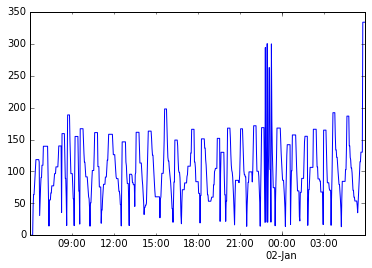

In [45]:
results['inferred appliance energy']['fridgefreezer'].mul(10).plot()

In [58]:
import json

In [86]:
j = json.load(open('/Users/nipunbatra/git/monthly-disaggregation/code/appliance_model_induced_density.json','r'))

In [91]:
j['heater']['numberOfCyclesStats']

{u'numberOfCycles': [0.0, 1.0, 2.0, 3.0, 4.0],
 u'numberOfCyclesDuration': [0.0,
  792.6666666666666,
  197.86666666666667,
  274.3478260869565,
  356.2857142857143],
 u'numberOfCyclesEnergy': [0.0,
  64765.519609559866,
  50833.26181996474,
  51472.09489305443,
  92099.1295736386],
 u'numberOfCyclesProb': [0.23113207547169812,
  0.3113207547169811,
  0.2830188679245283,
  0.10849056603773585,
  0.0660377358490566],
 u'numberOfSamples': [49.0, 66.0, 60.0, 23.0, 14.0]}

In [110]:
k = json.load(open('/Users/nipunbatra/Desktop/lbn.json','r'))

In [111]:
j['fridge']['numberOfCyclesStats']

{u'numberOfCycles': [16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  21.0,
  22.0,
  23.0,
  24.0,
  25.0,
  26.0,
  27.0,
  28.0,
  29.0,
  30.0,
  31.0,
  32.0,
  33.0,
  34.0,
  35.0,
  36.0,
  37.0,
  38.0,
  39.0,
  40.0,
  41.0,
  42.0,
  43.0,
  44.0,
  45.0,
  46.0,
  47.0,
  48.0,
  49.0,
  50.0],
 u'numberOfCyclesDuration': [351.3142857142857,
  301.4,
  303.94594594594594,
  304.3157894736842,
  346.0,
  373.52941176470586,
  359.1666666666667,
  289.8666666666667,
  286.4347826086956,
  346.4117647058824,
  394.2631578947368,
  349.54545454545456,
  321.7391304347826,
  311.5,
  308.2352941176471,
  323.0769230769231,
  357.55555555555554,
  287.75,
  292.0,
  332.3333333333333,
  326.2,
  338.4,
  346.3333333333333,
  370.0,
  387.2,
  424.6666666666667,
  469.3333333333333,
  443.3333333333333,
  396.44444444444446,
  348.75,
  280.6666666666667,
  314.25,
  316.85714285714283,
  336.85714285714283,
  317.2],
 u'numberOfCyclesEnergy': [4467.1022038975125,
  3832.4220192676403,
  

In [100]:
j['heater']['numberOfCyclesStats']['numberOfCyclesEnergy']

[0.0,
 64765.519609559866,
 50833.26181996474,
 51472.09489305443,
 92099.1295736386]

In [112]:
k['fridge']['numberOfCyclesStats']['numberOfCyclesEnergy']

[0,
 9300.178164,
 8028.924855,
 8231.979392,
 8398.09294,
 8659.792725,
 8217.456681,
 7629.769342,
 7289.051068,
 6864.080755,
 6795.877568,
 6559.599622,
 6394.693669,
 6323.904681,
 6515.684065,
 5839.727522]

In [115]:
k['fridge']['numberOfCyclesStats']

{u'numberOfCycles': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 u'numberOfCyclesDuration': [0,
  187.1070013,
  184.1363636,
  187,
  185.037037,
  182.1578947,
  178.9387755,
  167.5294118,
  160.3050847,
  148.9032258,
  146.8,
  133.509434,
  127.3176471,
  133.7288136,
  142.5490196,
  139.3030303],
 u'numberOfCyclesEnergy': [0,
  9300.178164,
  8028.924855,
  8231.979392,
  8398.09294,
  8659.792725,
  8217.456681,
  7629.769342,
  7289.051068,
  6864.080755,
  6795.877568,
  6559.599622,
  6394.693669,
  6323.904681,
  6515.684065,
  5839.727522],
 u'numberOfCyclesProb': [0.0006788866259,
  0.5139171758,
  0.02987101154,
  0.02579769179,
  0.0183299389,
  0.02579769179,
  0.03326544467,
  0.02308214528,
  0.04005431093,
  0.04209097081,
  0.0339443313,
  0.03598099117,
  0.0577053632,
  0.04005431093,
  0.03462321792,
  0.04480651731]}

In [116]:
j['heater']['numberOfCyclesStats']

{u'numberOfCycles': [0.0, 1.0, 2.0, 3.0, 4.0],
 u'numberOfCyclesDuration': [0.0,
  792.6666666666666,
  197.86666666666667,
  274.3478260869565,
  356.2857142857143],
 u'numberOfCyclesEnergy': [0.0,
  64765.519609559866,
  50833.26181996474,
  51472.09489305443,
  92099.1295736386],
 u'numberOfCyclesProb': [0.23113207547169812,
  0.3113207547169811,
  0.2830188679245283,
  0.10849056603773585,
  0.0660377358490566],
 u'numberOfSamples': [49.0, 66.0, 60.0, 23.0, 14.0]}